## Random Forest code along

# Kaggle dataset
 - BRSS Collects data (state based) on preventive health practices and risk behaviours
 - Tobbaco Use, Health care coverage, etc
 - Random sample of adults
 - one per household


In [1]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
df=pd.read_csv('data/behavioral_risk.csv')

big data? Took 9.4 sec to read

In [3]:
df.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,49.0,4.0,1100.0,2.015009e+09,2.015009e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
1,9.0,9.0,1100.0,2.015005e+09,2.015005e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
2,34.0,10.0,1100.0,2.015011e+09,2.015011e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
3,41.0,4.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
4,54.0,5.0,1100.0,2.015004e+09,2.015004e+09,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99719 entries, 0 to 99718
Columns: 314 entries, _STATE to _AIDTST3
dtypes: float64(314)
memory usage: 238.9 MB


304 columns, 99719 entries

In [5]:
df.isnull().sum()

_STATE          0
FMONTH          0
DISPCODE        0
SEQNO           0
_PSU            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    64126
_PNEUMO2    64126
_AIDTST3     9822
Length: 314, dtype: int64

who knows what those columns are about of the 304 ?

In [6]:
#is there any column called label?
df['label']


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99714    1.0
99715    1.0
99716    1.0
99717    1.0
99718    1.0
Name: label, Length: 99719, dtype: float64

In [7]:
# yes, there is already one, why? who made it? What does that mean? Does it matter to answer those questions?

In [8]:
# extract the labels
labels = np.array(df.pop('label'))

In [9]:
# split the df early?
# finally we define our constant random seed
RSEED = 42
train, test, train_labels, test_labels = train_test_split(df, labels, stratify=labels, test_size=0.3, random_state=RSEED)
# using stratification on the target, where is the division of 4 parts in the train set? inisde the algorithm?  

In [10]:
# Imputation? why? with mean of which values? all?, on both train and test
train = train.fillna(train.mean())
test = test.fillna(train.mean())  # do not forget we are using the mean of the TRAINING

In [11]:
features = list(train.columns) # returnms a list of the features 313 columns

In [12]:
# create a model with 100!!!! TREESS
model = RandomForestClassifier(n_estimators=100, random_state=RSEED, max_features='sqrt', n_jobs=-1, verbose =1) # why 100? max_features='sqrt': Determines the number of features to consider when looking for the best split. Setting it to 'sqrt' means that the number of features is set to the square root of the total number of features. This is a common choice as it often provides a good balance between performance and computational efficiency, max_features='sqrt': Determines the number of features to consider when looking for the best split. Setting it to 'sqrt' means that the number of features is set to the square root of the total number of features. This is a common choice as it often provides a good balance between performance and computational efficiency.

In [13]:
# fit on trainning data (remember amodel.fit(train, train_labelsbout the split of trainning data) I don't see it here
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.9s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [ ]:
# it took a long time, 42.5 sec, 100 trees, 10,000 entries, 304 columns

In [14]:
# Stats
n_nodes =[]
max_depths = []
for ind_tree in model.estimators_: # model estimators is a class that has functions that calculate statistics about the model
    n_nodes.append(ind_tree.tree_.node_count) # hahaha no clue what this functions and parameters are but it has to do with indeces and node count
    max_depths.append(ind_tree.tree_.max_depth) # sme here, who knows

print(f'Average number of nodes{int(np.mean(n_nodes))}') # the mean of the number of nodes for the 100 trees
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes13445
Average maximum depth 45


In [ ]:
# what does it says? What is the macx and the min of the # of nodes in the trees?
# is that relevant
# This is already a forestr, is it splitting the train df, and taking already the votes?, how do I call it? RandomForestClassifier why 100? why not 10 or 1000?

In [15]:
# to demonsstrate overfitting, we will display the predictions on the trainning, and on the testing sets
# this variables are used in the custom function defined below
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1] # probabilities, not probes
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [ ]:
# This output is different to the one in Notebook 1
# Because I split the code block
# Average number of node is more 13445 vs 13396, RSEED is the same, test done in Win11 and Linux, just different Notebooks
# Averagre maximum depth 45 vs 46
# is that relevant? what does that indicates or shows? 

Recall Baseline: 1.0 Test: 0.96 Train 1.0
Precision Baseline: 0.81 Test: 0.88 Train 1.0
Roc Baseline: 0.5 Test: 0.88 Train 1.0


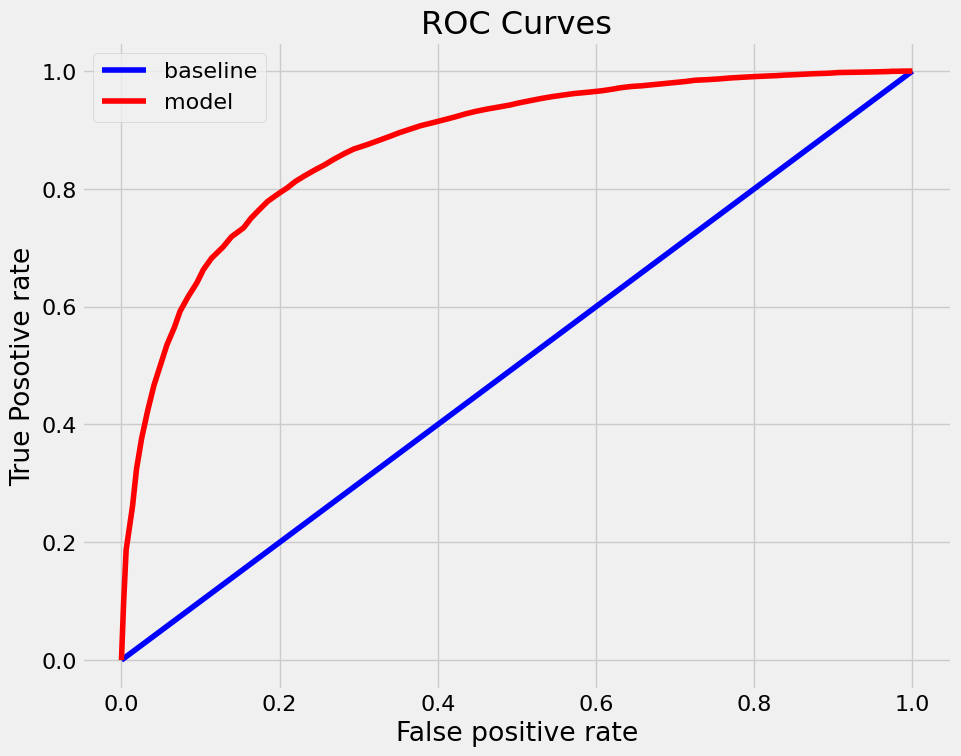

In [16]:
# plot formatting
plt.style.use('fivethirtyeight') #538?
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """ Compare machine learning model to baseline performance.
    Computes statistics and shows ROC Curve. """
    baseline ={} # dictionary
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))]) # its looping adding values, and the using the recall_score funct
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5

    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)

    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)

    for metric in ['recall','precision','roc']: # def of lst of str's that coincide with dics above defined
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric],2)} Test: {round(results[metric], 2)} Train {round(train_results[metric], 2)}')

    # calculate the false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize=(10,8))
    plt.rcParams['font.size'] = 16

    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label ='model')
    plt.legend();
    plt.xlabel('False positive rate')
    plt.ylabel('True Posotive rate');
    plt.title('ROC Curves')
    

evaluate_model(rf_predictions,rf_probs,train_rf_predictions,train_rf_probs)



Confussion matrix, without normalization
[[ 2384  3190]
 [  930 23412]]


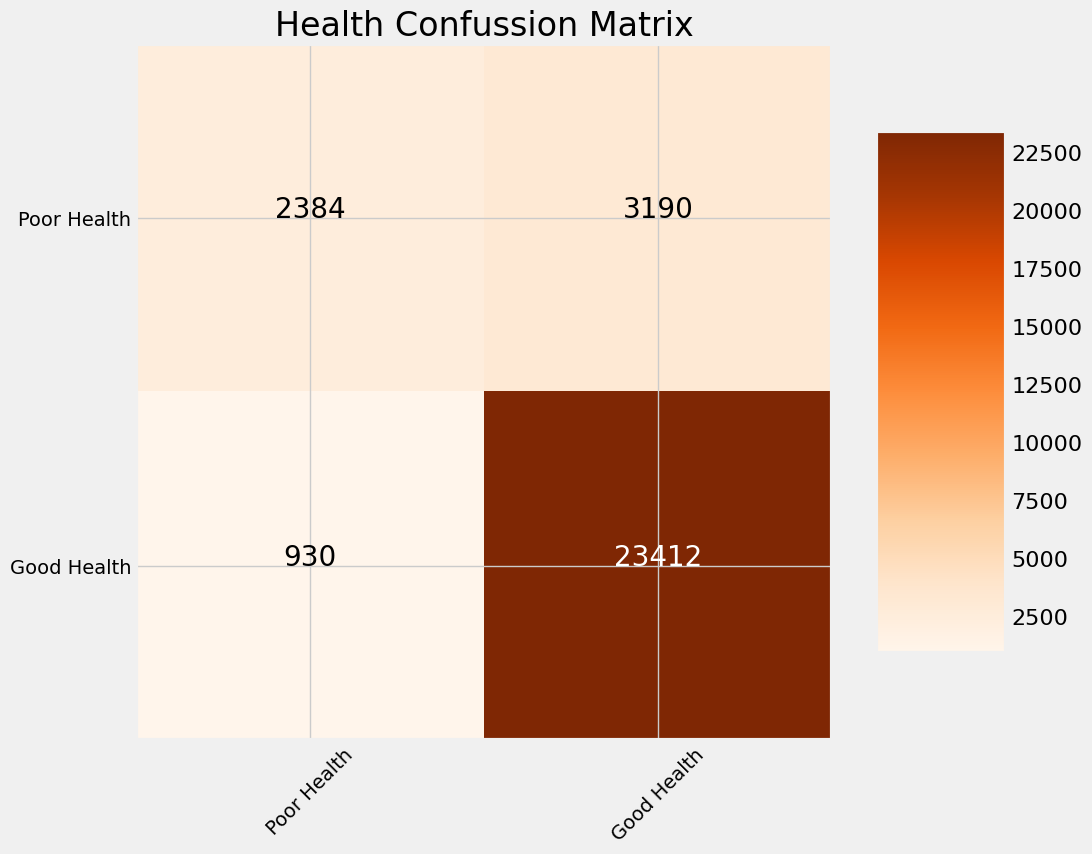

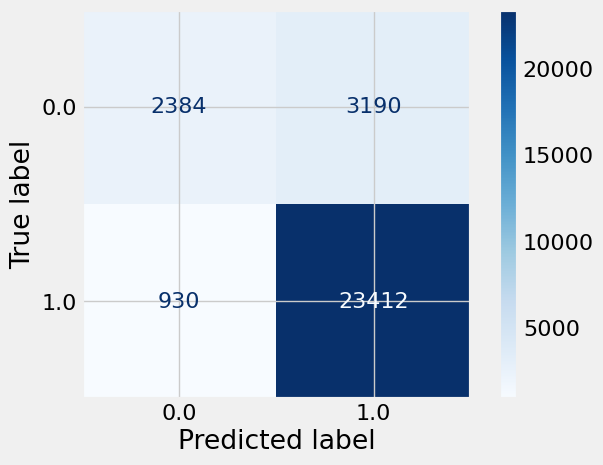

In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confussion Matrix', cmap=plt.cm.Oranges):
    """This function prints and plots the confussion matrix.
    Normalization can be applied by setting normalize = True
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print ('Normalized confussion matrix')
    else:
        print('Confussion matrix, without normalization')    
    print (cm)

    # plot the confussion matrix
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),fontsize=20,horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')

cm = confusion_matrix(test_labels, rf_predictions)    
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'], title="Health Confussion Matrix")

# To simplify the process of plotting and annotating confusion matrices, the ConfusionMatrixDisplay class from scikit-learn can be utilized: 

from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_true and y_pred are defined
ConfusionMatrixDisplay.from_predictions(test_labels, rf_predictions, cmap='Blues', values_format='d')
plt.show()
